# DPCM Card Game Simulator

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns

### Variables

In [2]:
purple = '#7f00ff'
orange = '#ff4500'

### Analysis

In [3]:
results_df = pd.read_csv('../data/results.csv')

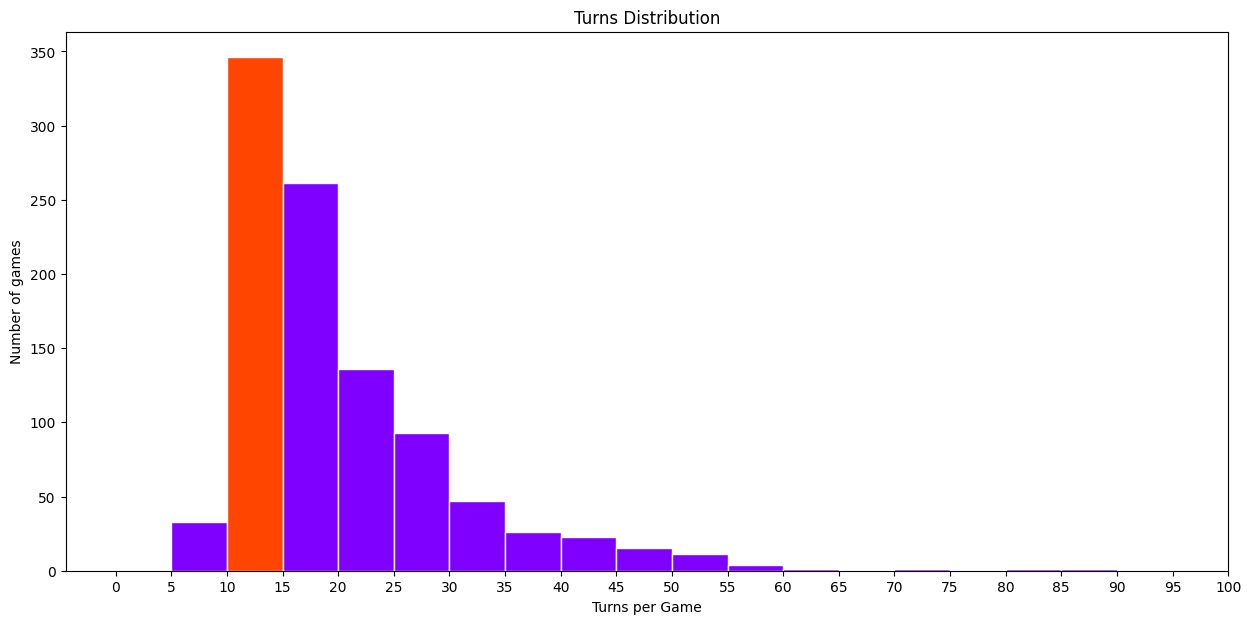

In [4]:
fig = plt.figure(1, figsize=(15, 7))

n, bins, patches = plt.hist(results_df['Turns'], bins=np.arange(0, max(results_df['Turns']), 5), color=purple, edgecolor='w')

x = range(max(results_df['Turns']))
plt.xticks(np.arange(min(x), max(x)+10, 5))

n = list(n)
patches[n.index(max(n))].set_fc(orange)

plt.xlabel('Turns per Game')
plt.ylabel('Number of games')

plt.title('Turns Distribution')

plt.show()

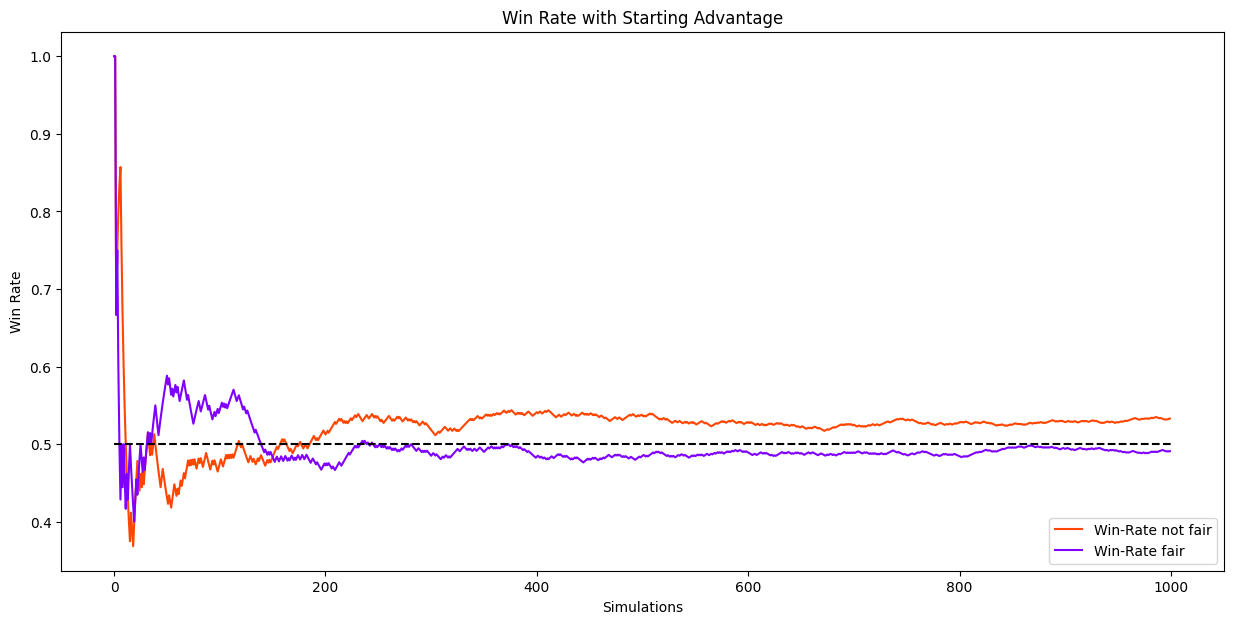

In [5]:
fig = plt.figure(1, figsize=(15, 7))

not_fair_file = 'not_fair.csv'
fair_file = 'fair.csv'

not_fair_df = pd.read_csv('../data/' + not_fair_file)
fair_df = pd.read_csv('../data/' + fair_file)

plt.plot(not_fair_df.index, not_fair_df['Rate'], color = orange, label='Win-Rate not fair')
plt.plot(fair_df.index, fair_df['Rate'], color = purple, label='Win-Rate fair')

plt.hlines(0.5, 0, len(not_fair_df), colors='black', linestyles='dashed')

plt.title('Win Rate with Starting Advantage')

plt.legend(loc='lower right')

plt.xlabel('Simulations')
plt.ylabel('Win Rate')

plt.show()

In [6]:
print(f'{abs(not_fair_df['Rate'].iloc[-1] - fair_df['Rate'].iloc[-1])*100:.2f}%')

4.20%


### Visits

In [7]:
visited_df = pd.read_csv('../data/visited.csv')

In [8]:
visited_df['MAX'] = visited_df.iloc[:, 1:].max(axis=1)
visited_df['HAND'] = visited_df['ID'].apply(lambda x: sum(eval(x)[3:]))

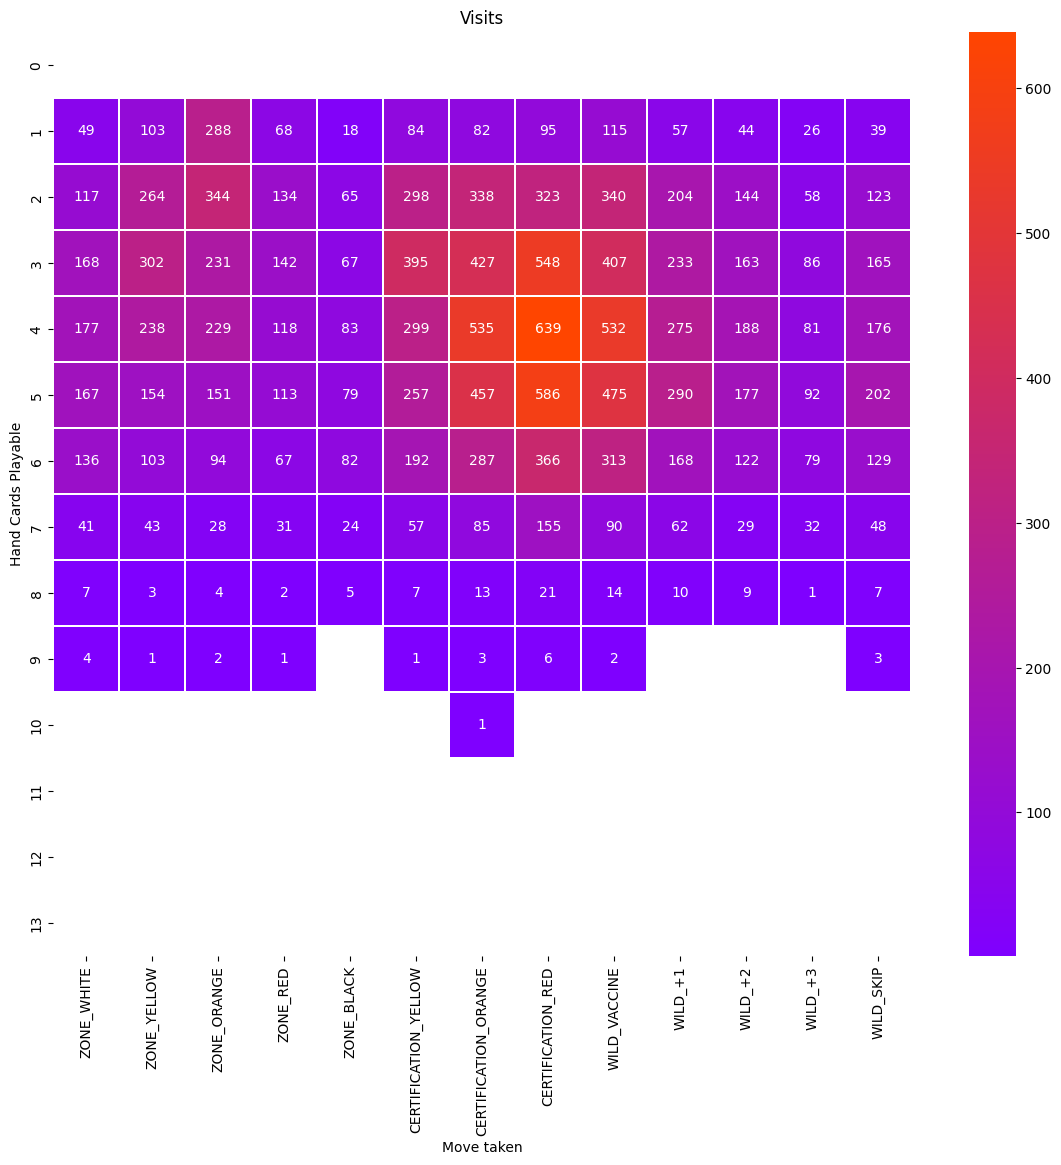

In [9]:
visited_pivot = visited_df.drop(columns='MAX').iloc[:, 1:].groupby('HAND').sum()
visited_pivot = visited_pivot.replace(0, np.NaN)

fig, ax = plt.subplots(1, 1, figsize = (15, 12))

cmap_custom = LinearSegmentedColormap.from_list('custom', [purple, orange])

sns.heatmap(visited_pivot, 
            fmt='.0f', 
            linewidth = 0.3, 
            annot = True,
            cbar = True,
            cmap=cmap_custom,
            square=True)

ax.title.set_text('Visits')

ax.set(xlabel='Move taken', ylabel='Hand Cards Playable')

plt.show()

### Exploration

In [10]:
visits_df = pd.read_csv('../data/visits.csv')

In [11]:
visits_df.head()

,Visits
0,1
1,0
2,1
3,1
4,1


In [12]:
visits_df['Cumsum'] = visits_df['Visits'].cumsum()

In [13]:
visits_df.head()

,Visits,Cumsum
0,1,1
1,0,1
2,1,2
3,1,3
4,1,4


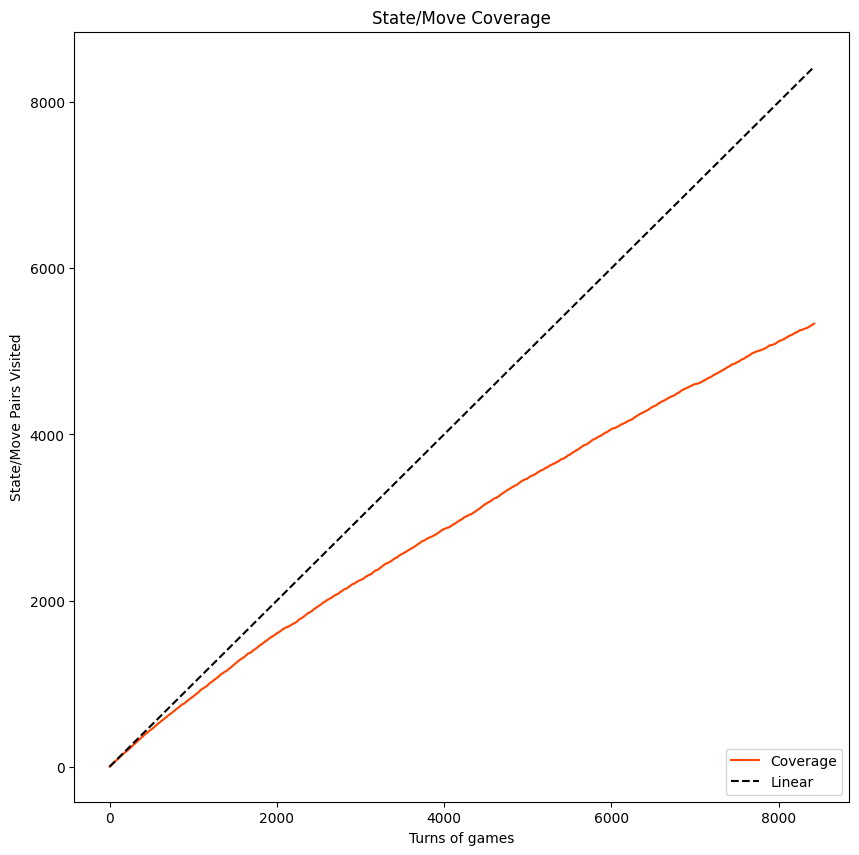

In [14]:
fig = plt.figure(1, figsize=(10, 10))

x = np.linspace(0, max(visits_df.index))
y = x

plt.plot(visits_df.index, visits_df['Cumsum'], color = orange, label='Coverage')
plt.plot(x, y, color = 'black', label='Linear', linestyle='--')

plt.title('State/Move Coverage')

plt.legend(loc='lower right')

plt.xlabel('Turns of games')
plt.ylabel('State/Move Pairs Visited')

plt.show()

### Cards Playable

In [15]:
visited_df = pd.read_csv('../data/visited.csv')

In [16]:
visited_df.head()

,ID,ZONE_WHITE,ZONE_YELLOW,ZONE_ORANGE,ZONE_RED,ZONE_BLACK,CERTIFICATION_YELLOW,CERTIFICATION_ORANGE,CERTIFICATION_RED,WILD_VACCINE,WILD_+1,WILD_+2,WILD_+3,WILD_SKIP
0,"(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,"(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,"(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
visited_df['VISITS'] = visited_df.iloc[:, 1:].max(axis=1)

In [18]:
visited_filtered_df = visited_df[visited_df['VISITS'] > 0]

In [19]:
visited_filtered_df.reset_index(drop=True, inplace=True)

In [20]:
visited_filtered_df.head()

,ID,ZONE_WHITE,ZONE_YELLOW,ZONE_ORANGE,ZONE_RED,ZONE_BLACK,CERTIFICATION_YELLOW,CERTIFICATION_ORANGE,CERTIFICATION_RED,WILD_VACCINE,WILD_+1,WILD_+2,WILD_+3,WILD_SKIP,VISITS
0,"(1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0
1,"(1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0
2,"(1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,"(1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,"(1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [21]:
print(len(visited_df), len(visited_filtered_df), str(round(len(visited_filtered_df)*100/len(visited_df), 2)) + '%')

786432 7918 1.01%


In [22]:
state_max_df = visited_filtered_df[['ID', 'VISITS']].copy()

In [23]:
state_max_df.head()

,ID,VISITS
0,"(1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0)",2.0
1,"(1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0)",2.0
2,"(1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0)",1.0
3,"(1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0)",1.0
4,"(1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1)",1.0


In [24]:
import ast

state_max_df['ID'] = state_max_df['ID'].apply(ast.literal_eval)

In [25]:
state_max_df.head()

,ID,VISITS
0,"(1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0)",2.0
1,"(1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0)",2.0
2,"(1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0)",1.0
3,"(1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0)",1.0
4,"(1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1)",1.0


In [26]:
state_max_df['HAND'] = state_max_df['ID'].apply(lambda x: x[3:])

In [27]:
state_max_df.head()

,ID,VISITS,HAND
0,"(1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0)",2.0,"(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0)"
1,"(1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0)",2.0,"(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0)"
2,"(1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0)",1.0,"(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0)"
3,"(1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0)",1.0,"(0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0)"
4,"(1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1)",1.0,"(0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1)"


In [28]:
state_max_df['HAND'] = state_max_df['HAND'].apply(lambda x: sum(x))

In [29]:
state_max_df.head()

,ID,VISITS,HAND
0,"(1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0)",2.0,1
1,"(1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0)",2.0,1
2,"(1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0)",1.0,2
3,"(1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0)",1.0,1
4,"(1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1)",1.0,2


In [30]:
state_max_df = state_max_df.drop('ID', axis=1)

In [31]:
state_max_df.head()

,VISITS,HAND
0,2.0,1
1,2.0,1
2,1.0,2
3,1.0,1
4,1.0,2


In [32]:
state_max_df = pd.DataFrame(state_max_df.groupby('HAND')['VISITS'].sum())

In [33]:
state_max_df.reset_index(drop=False, inplace=True)

In [34]:
state_max_df.head()

,HAND,VISITS
0,1,1068.0
1,2,2404.0
2,3,2558.0
3,4,2575.0
4,5,2349.0


In [35]:
state_max_df['PERCENTAGE'] = round((state_max_df['VISITS'] / state_max_df['VISITS'].sum())*100, 2)

In [36]:
state_max_df.head()

,HAND,VISITS,PERCENTAGE
0,1,1068.0,8.08
1,2,2404.0,18.20
2,3,2558.0,19.36
3,4,2575.0,19.49
4,5,2349.0,17.78


In [37]:
state_max_df = state_max_df.drop('VISITS', axis=1)

In [38]:
state_max_df.head()

,HAND,PERCENTAGE
0,1,8.08
1,2,18.20
2,3,19.36
3,4,19.49
4,5,17.78


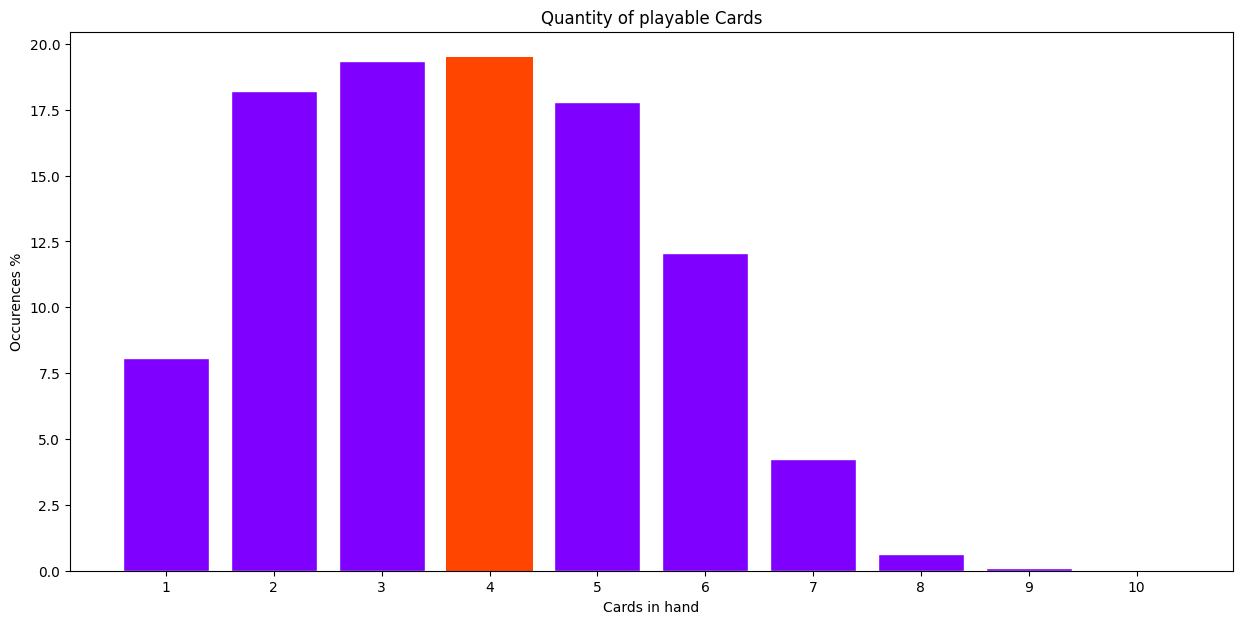

In [39]:
fig = plt.figure(1, figsize=(15, 7))

barra_piu_alta = state_max_df.loc[state_max_df['PERCENTAGE'].idxmax()]

plt.bar(state_max_df['HAND'], state_max_df['PERCENTAGE'], color=purple, edgecolor='w')
plt.bar(barra_piu_alta['HAND'], barra_piu_alta['PERCENTAGE'], color=orange)

plt.xticks(state_max_df['HAND'])

plt.xlabel('Cards in hand')
plt.ylabel('Occurences %')

plt.title('Quantity of playable Cards')

plt.show()

#### Q-Values

In [40]:
q_df = pd.read_csv('../data/q.csv')

In [41]:
q_df['MAX'] = q_df.iloc[:, 1:].max(axis=1)

In [42]:
q_df['HAND'] = q_df['ID'].apply(lambda x: sum(eval(x)[3:]))

In [43]:
q_curve = q_df.copy()

In [44]:
q_curve[['HAND', 'MAX']] = q_curve[['HAND', 'MAX']].replace(0, np.NaN)

q_mean = pd.Series(q_curve.iloc[:, 1:].groupby('HAND').mean()['MAX'])
q_max  = pd.Series(q_curve.iloc[:, 1:].groupby('HAND').max()['MAX'])
q_std  = pd.Series(q_curve.iloc[:, 1:].groupby('HAND').std()['MAX']) / 2

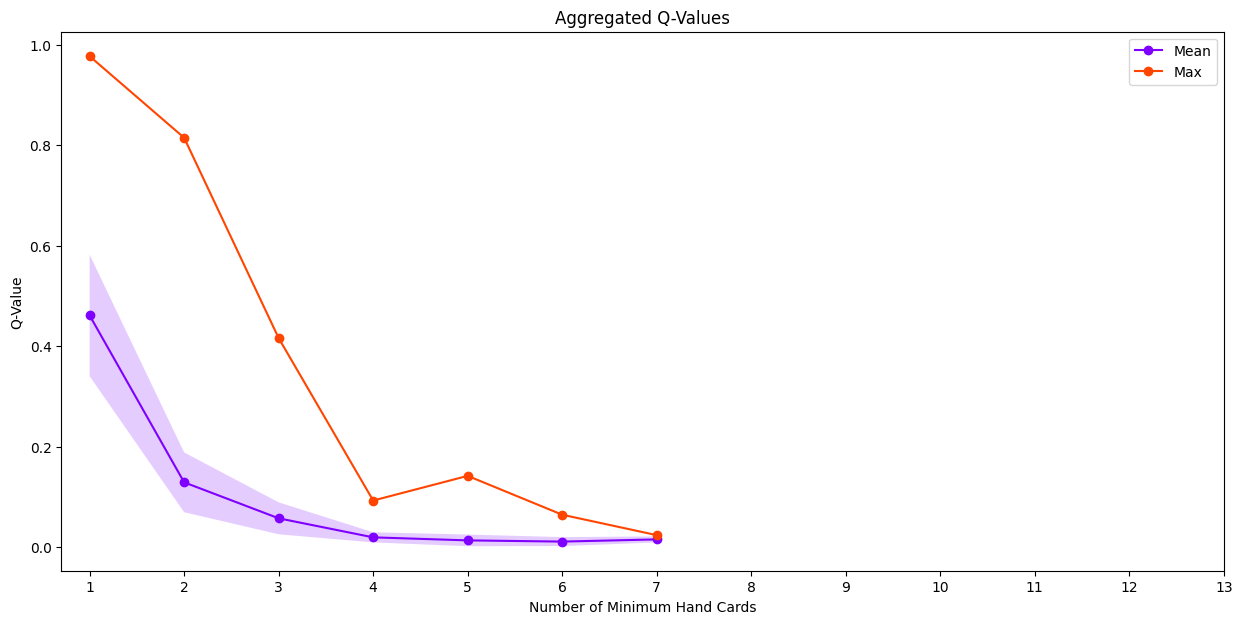

In [45]:
fig = plt.figure(1, figsize=(15,7))

plt.plot(q_mean.index, q_mean, label='Mean', marker='o', color=purple)
plt.plot(q_max.index,  q_max,  label='Max',  marker='o', color=orange)

plt.fill_between(q_mean.index, q_mean - q_std, q_mean + q_std, alpha=1/5, color=purple, edgecolor=None)

plt.xticks(q_mean.index)

plt.xlabel('Number of Minimum Hand Cards')
plt.ylabel('Q-Value')

plt.title('Aggregated Q-Values')

plt.legend()

plt.show()

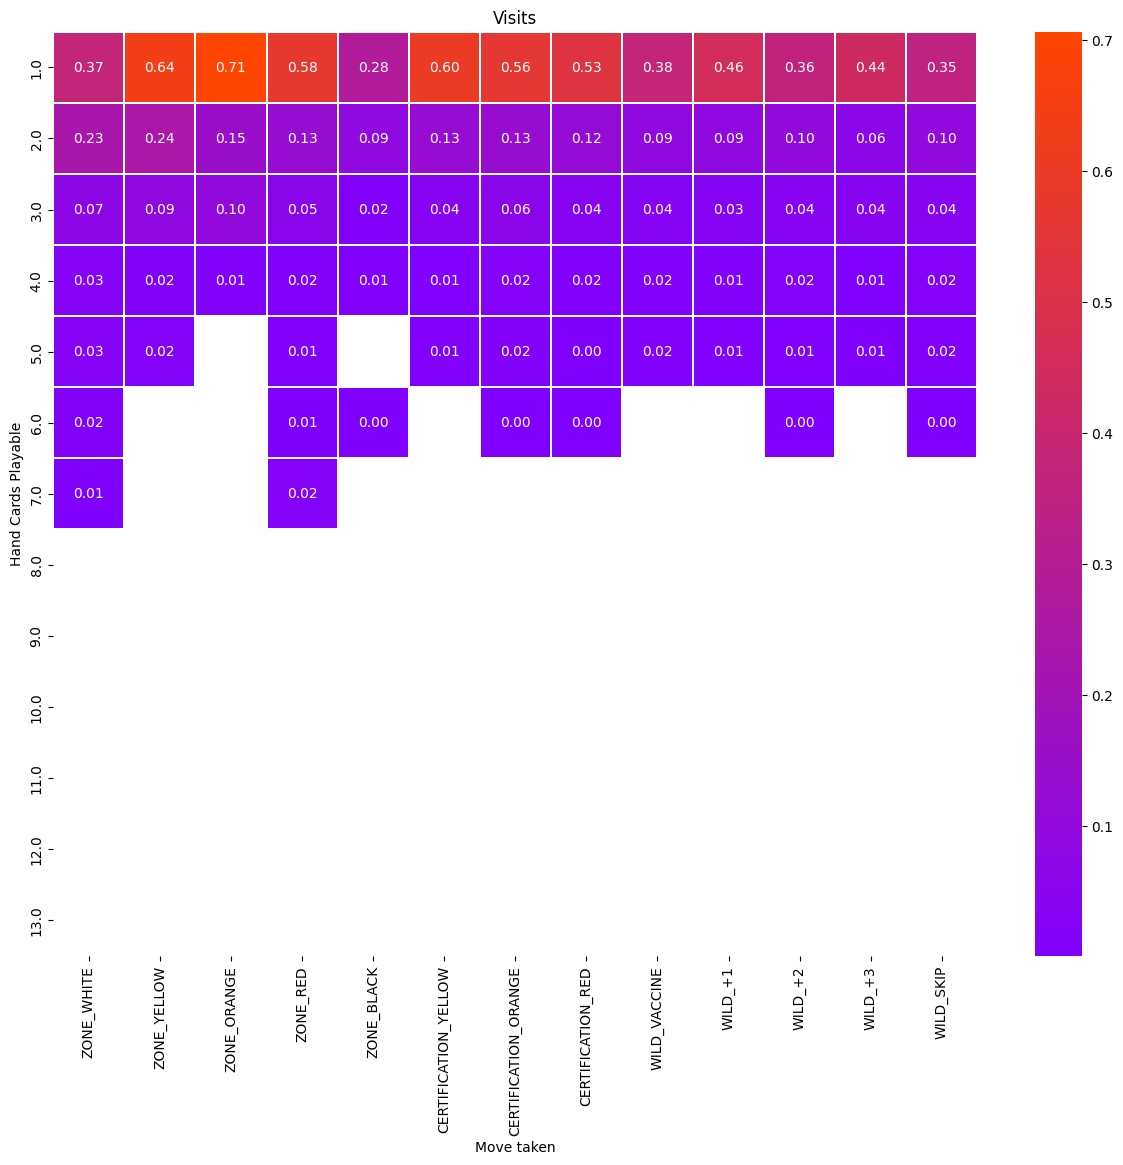

In [46]:
q_pivot = q_df.replace(0, np.NaN)
q_pivot = q_pivot.drop(columns='MAX').iloc[:, 1:].groupby('HAND').mean()

fig, ax = plt.subplots(1, 1, figsize = (15, 12))

cmap_custom = LinearSegmentedColormap.from_list('custom', [purple, orange])

sns.heatmap(q_pivot, 
            fmt='.2f', 
            linewidth = 0.3, 
            annot = True,
            cbar = True,
            cmap=cmap_custom,
            square=True)

ax.title.set_text('Visits')

ax.set(xlabel='Move taken', ylabel='Hand Cards Playable')

plt.show()